### Plot functions

In [97]:
import matplotlib.pyplot as plt
from plot_helper import form_df, plot_result

In [98]:
map_ylabel_dict={'train_loss':'Train loss', 
                     'val_acc':'f(x)-$f^\star$',
                    'grad_norm': '$||\\nabla f(x)||$',
                    #'lambda': '$\sqrt{ \\frac{\\frac{1}{n} \sum_{i=1}^n || \\nabla h_i (v^{r+1}) - \\nabla h_i (v^r)||^2}{ ||v^{r+1} - v^r||^2 } }$'}
                    'lambda': '$\lambda$',
                    'local_similarity': 'local similarity',
                    'local_smoothness': 'local smoothness',
                    }

map_xlabel_dict={'epoch':'Communication rounds',
               'total_nb_local_steps': 'Total number of gradient oracle calls'}
        
def form_styles(linewidth, markevery, markersize, linestyle):

    styles = {}

    styles['S-DANE'] = {'label':'S-DANE-GD (ours)',  'color':'blue', 'marker': 'o', 
                        'markersize':markersize, 'linewidth': linewidth, 
                        'markevery':markevery}
    
    styles['Adaptive S-DANE'] = {'label':'Adaptive S-DANE-GD (ours)',  'color':'blue', 'marker': None, 
                        'markersize':markersize, 'linewidth': linewidth, 'linestyle': linestyle,
                        'markevery':markevery}

    styles['Scaffold'] = {'label':'Scaffold',  'color':'green', 'marker': 's' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery }

    styles['Scaffnew'] = {'label':'Scaffnew',  'color':'darkorange', 'marker': '<' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery }

    styles['Fedprox'] = {'label':'FedProx-GD',  'color':'gray', 'marker': '>' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery}

    styles['DANE+'] = {'label':'DANE-GD',  'color':'black', 'marker': '^' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery }
    
    styles['GD'] = {'label':'GD',  'color':'purple', 'marker': '*' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery }
    
    styles['FedAvg'] = {'label':'FedAvg',  'color':'purple', 'marker': 'x' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery }
    
    styles['Acc-S-DANE'] = {'label':'Acc-S-DANE-GD (ours)',  'color':'red', 'marker': 'p' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery}
    
    styles['Adaptive Acc-S-DANE'] = {'label':'Adaptive Acc-S-DANE-GD (ours)',  'color':'red', 'marker': None ,
                            'markersize':markersize, 'linewidth': linewidth, 'linestyle': linestyle,
                        'markevery':markevery}
    
    styles['AccGradSliding'] = {'label':'AccGradSliding',  'color':'fuchsia', 'marker': '*' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery}
    
    return styles


### Quadratics

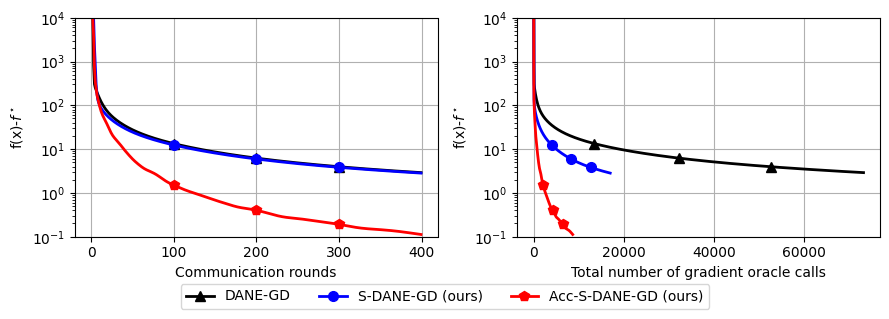

In [3]:
optims = ['S-DANE', 'DANE+','Acc-S-DANE','AccGradSliding']

plot_config = {'nbrows': 1, 'nbcols':2, 'linewidth': [2]*2, 'markersize': [7]*2, 
               'markevery': [100,100], 'alpha': 0.2, 'yscales': ['log']*2, 'linestyle': None,
               'xscales':['linear']*2, 
               'legend_kwargs':{'loc':'outside lower center', 'ncol':12,'bbox_to_anchor':(0.5,-0.07)},
               'legend_index': 0, 'figsize':(9,3), 
               'font_config':{'fontname':"Times New Roman", 'size':12,'fontweight':"bold"},
               'titles':['']+[''],
               'avg':'median','filter_list':[optims]*2,
               'ylim':[[0.1,10000]]*2, 'xlim':[None]*2,'order_labels':None}

path_results = [r"./results/quadra_convex/all"]*2

ylabels = ['val_acc']*2 
xlabels = ['epoch'] + ["total_nb_local_steps"]

fig, axs = plot_result(path_results, ylabels, xlabels, map_xlabel_dict, map_ylabel_dict, form_styles, plot_config)
plt.tight_layout()
fig.savefig('./figures/convex-intro.pdf',dpi=1600,bbox_inches='tight')


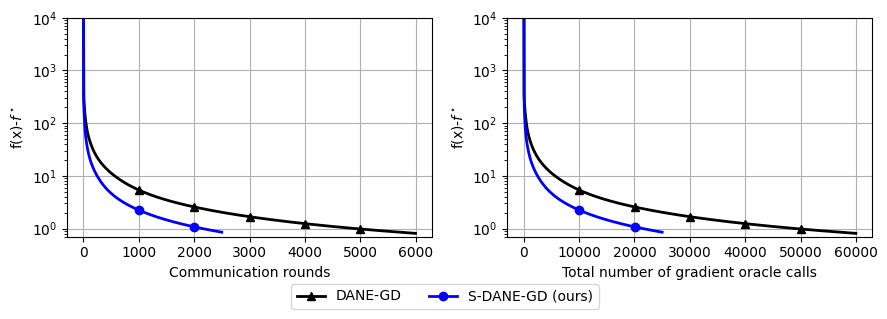

In [80]:
optims = ['S-DANE', 'DANE+','Acc-S-DANE','AccGradSliding']

plot_config = {'nbrows': 1, 'nbcols':2, 'linewidth': [2]*2, 'markersize': [6]*2, 'linestyle': None,
               'markevery': [1000,1000], 'alpha': 0.2, 'yscales': ['log']*2, 
               'xscales':['linear']*2, 
               'legend_kwargs':{'loc':'outside lower center', 'ncol':12,'bbox_to_anchor':(0.5,-0.07)},
               'legend_index': 0, 'figsize':(9,3), 
               'font_config':{'fontname':"Times New Roman", 'size':12,'fontweight':"bold"},
               'titles':['']+[''],
               'avg':'median','filter_list':[optims]*2,
               'ylim':[[0.7,10000]]*2, 'xlim':[None]*2,'order_labels':None}

path_results = [r"./results/quadra_convex/same-local-steps"]*2

ylabels = ['val_acc']*2 
xlabels = ['epoch'] + ["total_nb_local_steps"]

fig, axs = plot_result(path_results, ylabels, xlabels, map_xlabel_dict, map_ylabel_dict, form_styles, plot_config)
plt.tight_layout()
fig.savefig('./figures/convex-same-local-step.pdf',dpi=1600,bbox_inches='tight')

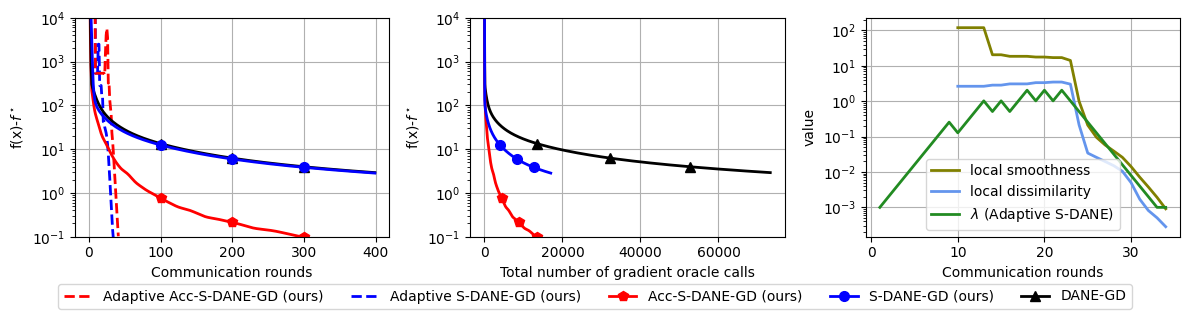

In [101]:
optims = ['S-DANE', 'DANE+', 'Adaptive S-DANE','Acc-S-DANE','Adaptive Acc-S-DANE']
order_labels = {'Adaptive Acc-S-DANE-GD (ours)': 1, 'Adaptive S-DANE-GD (ours)': 2, 'Acc-S-DANE-GD (ours)':3, 'S-DANE-GD (ours)':4, 'DANE-GD': 5}


plot_config = {'nbrows': 1, 'nbcols':3, 'linewidth': [2]*3, 'markersize': [7]*3, 
               'markevery': [100,100,100], 'alpha': 0.2, 'yscales': ['log']*3, 'linestyle': ['--']*3,
               'xscales':['linear']*3, 
               'legend_kwargs':{'loc':'outside lower center', 'ncol':12,'bbox_to_anchor':(0.5,-0.07)},
               'legend_index': 0, 'figsize':(12,3), 
               'font_config':{'fontname':"Times New Roman", 'size':12,'fontweight':"bold"},
               'titles':['']*3,
               'avg':'median','filter_list':[optims] + [['S-DANE', 'DANE+', 'Acc-S-DANE']]+['None'],
               'ylim':[[0.1,10000]]*3, 'xlim':[None]*3,'order_labels':order_labels}

path_results = [r"./results/quadra_convex/adaptive"]*3

ylabels = ['val_acc']*3 
xlabels = ['epoch'] + ["total_nb_local_steps"] + ['epoch']

fig, axs = plot_result(path_results, ylabels, xlabels, map_xlabel_dict, map_ylabel_dict, form_styles, plot_config)

local_smoothness = form_df(r"./results/quadra_convex/adaptive", 'epoch', 'local_smoothness', avg='mean',filter_list=['Adaptive S-DANE'])[1]
local_dissimilarity = form_df(r"./results/quadra_convex/adaptive", 'epoch', 'local_similarity', avg='mean',filter_list=['Adaptive S-DANE'])[1]
lambda_sdane = form_df(r"./results/quadra_convex/adaptive", 'epoch', 'lambda', avg='mean',filter_list=['Adaptive S-DANE'])[1][1:]

axs[2].set_yscale('log')
axs[2].grid(True)
axs[2].plot(local_smoothness, label='local smoothness', linewidth=2, color='olive')
axs[2].plot(local_dissimilarity, label='local dissimilarity', linewidth=2, color='cornflowerblue')
axs[2].plot(lambda_sdane, label='$\lambda$ (Adaptive S-DANE)', linewidth=2, color='forestgreen')
axs[2].legend()
axs[2].set_ylabel('value')
axs[2].set_xlabel('Communication rounds')
plt.tight_layout()
fig.savefig('./figures/convex-intro-new.pdf',dpi=1600,bbox_inches='tight')

### Logistic regression with LIBSVM dataset

### Impact of adaptive $\lambda$ (ijcnn)

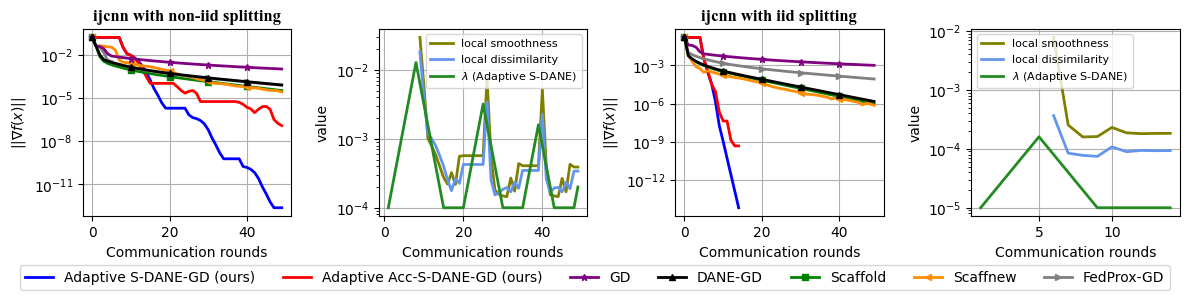

In [96]:
optims = []
order_labels = {'Adaptive S-DANE-GD (ours)': 1, 'Adaptive Acc-S-DANE-GD (ours)': 2, 'GD': 3, 'DANE-GD':4, 'Scaffold':5, 'Scaffnew': 6, 'FedProx-GD':7}

plot_config = {'nbrows': 1, 'nbcols':4, 'linewidth': [2]*4, 'markersize': [5]*4, 
               'markevery': [10]*3+[10], 'alpha': 0.2, 'yscales': ['log']*4, 
               'xscales':['linear']*4, 'linestyle': None,
               'legend_kwargs':{'loc':'outside lower center', 'ncol':12,'bbox_to_anchor':(0.5,-0.08)},
               'legend_index': 0, 'figsize':(12,2.8), 
               'font_config':{'fontname':"Times New Roman", 'size':12,'fontweight':"bold"},
               'titles':['ijcnn with non-iid splitting','Second-order Dissimilarity','ijcnn with iid splitting','Second-order Dissimilarity'],
               'avg':'mean','filter_list':[optims]+['None']+[optims]+['None'],
               'ylim':[None]*4, 'xlim':[None]*4, 'order_labels':order_labels}

path_results = [r"./results/libsvm/ijcnn/non_iid",
                r"./results/libsvm/ijcnn/non_iid",
                r"./results/libsvm/ijcnn/iid",
                r"./results/libsvm/ijcnn/iid"] 

ylabels = (['grad_norm'] + ['lambda'])*2

xlabels = ['epoch']*4

fig, axs = plot_result(path_results, ylabels, xlabels, map_xlabel_dict, map_ylabel_dict, form_styles, plot_config)

local_smoothness_noniid = form_df(r"./results/libsvm/ijcnn/non_iid", 'epoch', 'local_smoothness', avg='mean',filter_list=['Adaptive S-DANE'])[1]
local_dissimilarity_noniid = form_df(r"./results/libsvm/ijcnn/non_iid", 'epoch', 'local_similarity', avg='mean',filter_list=['Adaptive S-DANE'])[1]
lambda_sdane_noniid = form_df(r"./results/libsvm/ijcnn/non_iid", 'epoch', 'lambda', avg='mean',filter_list=['Adaptive S-DANE'])[1][1:]
#lambda_acc_sdane = form_df(r"./results/libsvm/ijcnn/non_iid", 'epoch', 'lambda', avg='mean',filter_list=['Adaptive Acc-S-DANE'])[1][1:]

axs[1].set_yscale('log')
axs[1].grid(True)
axs[1].plot(local_smoothness_noniid, label='local smoothness', linewidth=2, color='olive')
axs[1].plot(local_dissimilarity_noniid, label='local dissimilarity', linewidth=2, color='cornflowerblue')
axs[1].plot(lambda_sdane_noniid, label='$\lambda$ (Adaptive S-DANE)', linewidth=2, color='forestgreen')
#axs[1].plot(lambda_acc_sdane, label='$\lambda$ (Adaptive Acc-S-DANE)', linewidth=2, color='red')
axs[1].legend(loc='upper right', fontsize=8)
axs[1].set_ylabel('value')
axs[1].set_xlabel('Communication rounds')


local_smoothness_iid = form_df(r"./results/libsvm/ijcnn/iid", 'epoch', 'local_smoothness', avg='mean',filter_list=['Adaptive S-DANE'])[1]
local_dissimilarity_iid = form_df(r"./results/libsvm/ijcnn/iid", 'epoch', 'local_similarity', avg='mean',filter_list=['Adaptive S-DANE'])[1]
lambda_sdane_iid = form_df(r"./results/libsvm/ijcnn/iid", 'epoch', 'lambda', avg='mean',filter_list=['Adaptive S-DANE'])[1][1:]
#lambda_acc_sdane = form_df(r"./results/libsvm/ijcnn/non_iid", 'epoch', 'lambda', avg='mean',filter_list=['Adaptive Acc-S-DANE'])[1][1:]

axs[3].set_yscale('log')
axs[3].grid(True)
axs[3].plot(local_smoothness_iid, label='local smoothness', linewidth=2, color='olive')
axs[3].plot(local_dissimilarity_iid, label='local dissimilarity', linewidth=2, color='cornflowerblue')
axs[3].plot(lambda_sdane_iid, label='$\lambda$ (Adaptive S-DANE)', linewidth=2, color='forestgreen')
#axs[1].plot(lambda_acc_sdane, label='$\lambda$ (Adaptive Acc-S-DANE)', linewidth=2, color='red')
axs[3].legend(loc='upper left', fontsize=8)
axs[3].set_ylabel('value')
axs[3].set_xlabel('Communication rounds')


plt.tight_layout()
fig.savefig('./figures/ijcnn-new.pdf',dpi=1600,bbox_inches='tight')

### Polyhedron feasibility problem

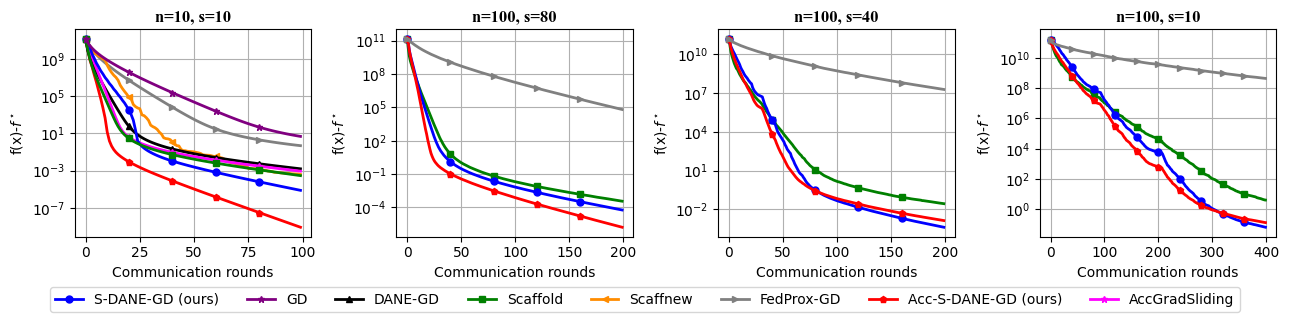

In [5]:
optims = []
order_labels = {'S-DANE-GD (ours)': 1, 'GD': 2, 'DANE-GD':3, 'Scaffold':4, 'Scaffnew': 5, 'FedProx-GD':6, 'FedAvg':7, 'Acc-S-DANE-GD (ours)':8, 'AccGradSliding':9}

plot_config = {'nbrows': 1, 'nbcols':4, 'linewidth': [2]*4, 'markersize': [5]*4, 
               'markevery': [20,40,40,40], 'alpha': 0.2, 'yscales': ['log']*4, 
               'xscales':['linear']*4, 'linestyle': None,
               'legend_kwargs':{'loc':'outside lower center', 'ncol':12,'bbox_to_anchor':(0.5,-0.08)},
               'legend_index': 0, 'figsize':(13,3), 
               'font_config':{'fontname':"Times New Roman", 'size':12,'fontweight':"bold"},
               'titles':['n=10, s=10','n=100, s=80','n=100, s=40','n=100, s=10'],
               'avg':'mean','filter_list':[optims]*4,
               'ylim':[None]*4, 'xlim':[None]*4,'order_labels': order_labels}

path_results = [r"./results/polyhedron/nosample",
                r"./results/polyhedron/sample3",
                r"./results/polyhedron/sample2",
                r"./results/polyhedron/sample1",
                ]

ylabels = ['val_acc']*4

xlabels = ['epoch']*4

fig, axs = plot_result(path_results, ylabels, xlabels, map_xlabel_dict, map_ylabel_dict, form_styles, plot_config)
plt.tight_layout()
fig.savefig('./figures/polyhedron.pdf',dpi=1600,bbox_inches='tight')

### CIFAR10 ($\alpha = 0.5$)

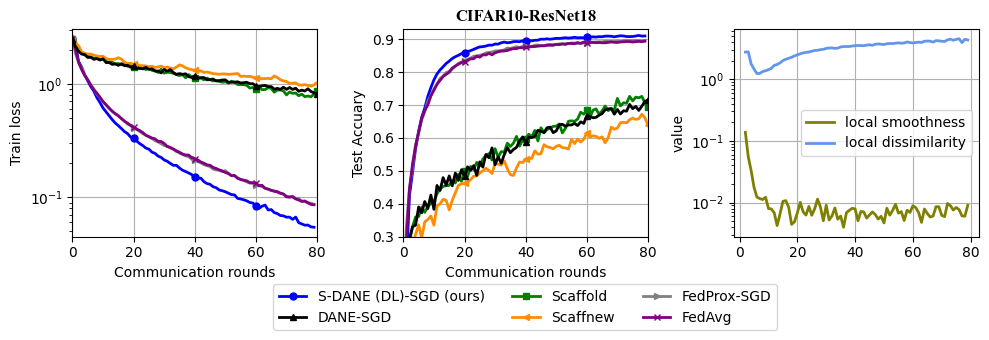

In [58]:
optims = ['S-DANE-nocv', 'DANE+','Scaffold','Fedprox','FedAvg','Scaffnew']
order_labels = {'S-DANE (DL)-SGD (ours)': 1, 'DANE-SGD':2, 'Scaffold':3, 'Scaffnew': 4, 'FedProx-SGD':5, 'FedAvg':6}

def form_styles(linewidth, markevery, markersize, linestyle=None):

    styles = {}

    styles['S-DANE-nocv'] = {'label':'S-DANE (DL)-SGD (ours)',  'color':'blue', 'marker': 'o', 
                        'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery}

    styles['Scaffold'] = {'label':'Scaffold',  'color':'green', 'marker': 's' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery }

    styles['Scaffnew'] = {'label':'Scaffnew',  'color':'darkorange', 'marker': '<' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery }

    styles['Fedprox'] = {'label':'FedProx-SGD',  'color':'gray', 'marker': '>' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery}

    styles['DANE+'] = {'label':'DANE-SGD',  'color':'black', 'marker': '^' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery }
    
    styles['FedAvg'] = {'label':'FedAvg',  'color':'purple', 'marker': 'x' ,
                            'markersize':markersize, 'linewidth': linewidth,
                        'markevery':markevery }
    
    return styles

plot_config = {'nbrows': 1, 'nbcols':3, 'linewidth': [2]*3, 'markersize': [5]*3, 
               'markevery': [20,20,20], 'alpha': 0.2, 'yscales': ['log']+['linear']+[''], 
               'xscales':['linear']*3, 'linestyle': None,
               'legend_kwargs':{'loc':'outside lower center', 'ncol':3,'bbox_to_anchor':(0.53,-0.14)},
               'legend_index': 1,'font_config':{'fontname':"Times New Roman", 'size':12,'fontweight':"bold"},
               'figsize':(10,3), 
               'titles':[' ','CIFAR10-ResNet18',''],
               'avg':'mean', 'ylim':[None,[0.3,0.93],None], 'xlim':[[0,80]]*3,
               'filter_list':[optims,optims,['None']], 'order_labels':order_labels}

path_results = [r"./results/cifar10",
                r"./results/cifar10",
                r"./results/cifar10",]

map_ylabel_dict['val_acc'] = 'Test Accuary'

ylabels = ["train_loss","val_acc"] + ['']
xlabels = ['epoch', 'epoch'] + ['']

fig, axs = plot_result(path_results, ylabels, xlabels, map_xlabel_dict, map_ylabel_dict, form_styles, plot_config)

local_smoothness = form_df(r"./results/cifar10_local_smooth", 'epoch', 'local_smoothness', avg='mean',filter_list=['S-DANE-nocv'])[1]
local_dissimilarity = form_df(r"./results/cifar10_local_smooth", 'epoch', 'local_similarity', avg='mean',filter_list=['S-DANE-nocv'])[1]

axs[2].set_yscale('log')
axs[2].grid(True)
axs[2].plot(local_smoothness, label='local smoothness', linewidth=2, color='olive')
axs[2].plot(local_dissimilarity, label='local dissimilarity', linewidth=2, color='cornflowerblue')
axs[2].legend()
axs[2].set_ylabel('value')

plt.tight_layout()
fig.savefig('./figures/cifar_main_new.pdf',dpi=1600,bbox_inches='tight')